In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

## 경기도 지역화폐 발행 및 이용 현황

In [2]:
#라이브러리 import
import requests
import json
import pandas as pd
import numpy as np

url = 'https://openapi.gg.go.kr/RegionMnyPublctUse'
params ={'KEY' : '72e1082c14714edcb1faedaa88acff59', 
         'Type' : 'json', 
         'plndex' : '1',
         'pSize' : '1000' }

response = requests.get(url, params=params)
contents = response.content

In [3]:
json_localmoney = json.loads(contents)
body = json_localmoney['RegionMnyPublctUse'][1]['row']
df_localmoney = pd.json_normalize(body)
df_localmoney

SIGUN_CD SIGUN_NM   STD_YM  CARD_PUBLCT_CNT  CARD_CHRGNG_AMT  \
0      41480      파주시  2021-05          10829.0        9704216.0   
1      41220      평택시  2021-05           6686.0       13681523.0   
2      41650      포천시  2021-05           1559.0        2701165.0   
3      41450      하남시  2021-05           4153.0       11646402.0   
4      41590      화성시  2021-05           7615.0       26955815.0   
..       ...      ...      ...              ...              ...   
995    41610      광주시  2022-05           2504.0       23641363.0   
996    41310      구리시  2022-05          18969.0       11306436.0   
997    41410      군포시  2022-05           2297.0       15994841.0   
998    41570      김포시  2022-05              NaN              NaN   
999    41360     남양주시  2022-05           3913.0       23608793.0   

     CARD_USE_AMT  MOBILE_GIFTCERTF_USER_CNT  MOBILE_CHRGNG_AMT  \
0       9123830.0                        NaN                NaN   
1      12335711.0                        NaN                NaN   
2       2523209.0                        NaN                NaN   
3      13880948.0                        NaN                NaN   
4      27578227.0                        NaN                NaN   
..            ...                        ...                ...   
995    23687402.0                        NaN                NaN   
996    13181766.0                        NaN                NaN   
997    16802768.0                        NaN                NaN   
998           NaN                     4487.0         31684958.0   
999    24752046.0                        NaN                NaN   

     MOBILE_USE_AMT  BRNHSTRM_GIFTCERTF_SALE_AMT  \
0               NaN                          NaN   
1               NaN                    1703245.0   
2               NaN                     319205.0   
3               NaN                          NaN   
4               NaN                          NaN   
..              ...                          ...   
995             NaN                          NaN   
996             NaN                          NaN   
997             NaN                          NaN   
998      33034471.0                          NaN   
999             NaN                          NaN   

     BRNHSTRM_GIFTCERTF_RETRVL_AMT  
0                              NaN  
1                        2458660.0  
2                         270563.0  
3                              NaN  
4                              NaN  
..                             ...  
995                            NaN  
996                            NaN  
997                            NaN  
998                            NaN  
999                            NaN  

[1000 rows x 11 columns]

In [4]:
df_localmoney['SIGUN_NM'].value_counts()

연천군     33
안양시     33
용인시     33
군포시     33
안산시     33
김포시     33
남양주시    33
양평군     33
양주시     33
오산시     33
여주시     33
안성시     33
구리시     32
평택시     32
성남시     32
광주시     32
파주시     32
광명시     32
의정부시    32
고양시     32
시흥시     32
동두천시    32
부천시     32
과천시     32
이천시     32
수원시     32
의왕시     32
가평군     31
화성시     31
하남시     31
포천시     31
Name: SIGUN_NM, dtype: int64

In [5]:
time_list = df_localmoney['STD_YM'].unique()
time_list.sort()
time_list

array(['2019-01', '2019-02', '2019-03', '2019-04', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-10', '2022-11', '2022-12'],
      dtype=object)

## 수원시 지역화폐 데이터 분석

In [6]:
df_suwon = df_localmoney[df_localmoney['SIGUN_NM'] == "수원시"].reset_index()

In [7]:
df_suwon.drop([16,17,18], inplace = True)

In [8]:
df_suwon.sort_values(by = "STD_YM", inplace = True)

In [9]:
df_suwon

index SIGUN_CD SIGUN_NM   STD_YM  CARD_PUBLCT_CNT  CARD_CHRGNG_AMT  \
19    606    41110      수원시  2019-04           4505.0         924101.0   
20    628    41110      수원시  2019-08           6271.0        3339872.0   
21    659    41110      수원시  2019-09           4209.0        1372844.0   
22    690    41110      수원시  2019-10           7390.0        5550020.0   
23    721    41110      수원시  2019-11           3098.0        1706971.0   
24    752    41110      수원시  2019-12           5879.0        5005054.0   
25    783    41110      수원시  2020-01           5948.0        4803386.0   
26    814    41110      수원시  2020-02           9069.0        2178828.0   
27    845    41110      수원시  2020-03          13576.0        7967046.0   
28    876    41110      수원시  2020-04         203175.0       15060595.0   
29    907    41110      수원시  2020-05          74407.0       17845709.0   
9     281    41110      수원시  2020-12          11906.0       23074013.0   
10    312    41110      수원시  2021-01          19139.0       20073612.0   
11    343    41110      수원시  2021-02          32993.0       22486684.0   
12    374    41110      수원시  2021-03          17865.0       22486684.0   
13    405    41110      수원시  2021-04          25109.0       27421284.0   
14    436    41110      수원시  2021-05          12167.0       26431115.0   
0      17    41110      수원시  2021-06          34891.0       39592231.0   
1      48    41110      수원시  2021-07           9097.0       25919121.0   
2      79    41110      수원시  2021-08          11777.0       25919121.0   
6     200    41110      수원시  2021-09          20812.0       25919121.0   
7     231    41110      수원시  2021-10          18658.0       20422726.0   
8     262    41110      수원시  2021-11          24357.0       37254826.0   
3     113    41110      수원시  2021-12          11793.0       38589931.0   
4     144    41110      수원시  2022-01          10244.0       35517134.0   
5     175    41110      수원시  2022-02          10004.0       26493652.0   
30    941    41110      수원시  2022-03          10678.0       32314288.0   
31    972    41110      수원시  2022-04           8983.0       34439482.0   
15    479    41110      수원시  2022-12           6991.0       33114060.0   

    CARD_USE_AMT  MOBILE_GIFTCERTF_USER_CNT  MOBILE_CHRGNG_AMT  \
19      151025.0                        NaN                NaN   
20     3305846.0                        NaN                NaN   
21     2397516.0                        NaN                NaN   
22     3240156.0                        NaN                NaN   
23     3309251.0                        NaN                NaN   
24     3508175.0                        NaN                NaN   
25     3644121.0                        NaN                NaN   
26     3042140.0                        NaN                NaN   
27     4265271.0                        NaN                NaN   
28     8229987.0                        NaN                NaN   
29    15787540.0                        NaN                NaN   
9     20287869.0                        NaN                NaN   
10    18991978.0                        NaN                NaN   
11    16312959.0                        NaN                NaN   
12    16312959.0                        NaN                NaN   
13    24984584.0                        NaN                NaN   
14    26700384.0                        NaN                NaN   
0     35850859.0                        NaN                NaN   
1     30400028.0                        NaN                NaN   
2     30400028.0                        NaN                NaN   
6     30400028.0                        NaN                NaN   
7     23899626.0                        NaN                NaN   
8     31175985.0                        NaN                NaN   
3     35437544.0                        NaN                NaN   
4     37412949.0                        NaN                NaN   
5     30490745.0                        NaN                NaN   
3

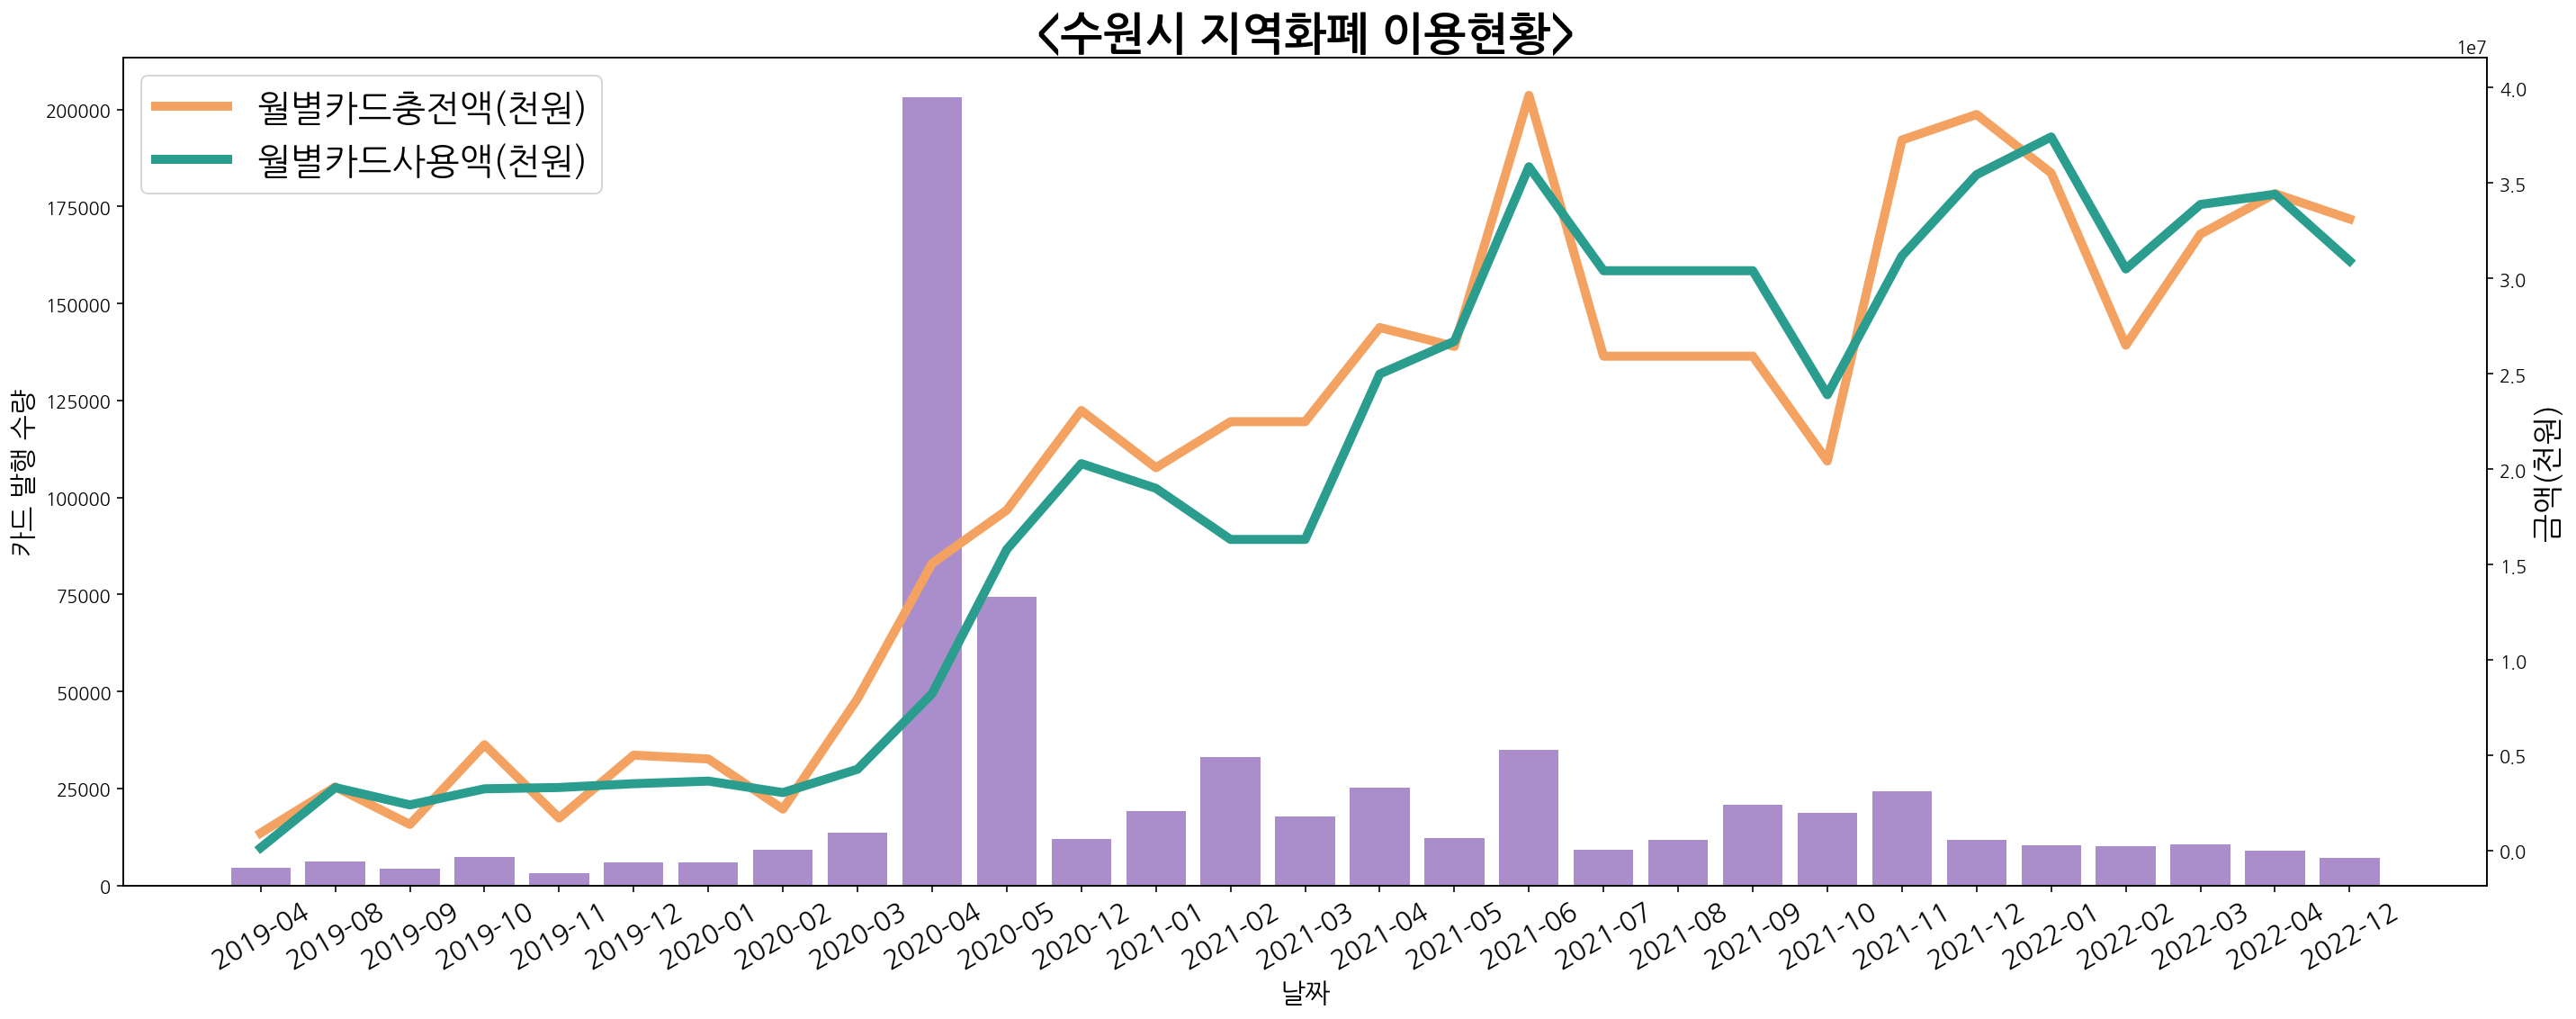

In [10]:
plt.figure(figsize = (20, 8))

time = df_suwon['STD_YM'].unique()
time.sort()

ax1 = sns.barplot(x = "STD_YM", y = "CARD_PUBLCT_CNT", data = df_suwon, label = "월별카드발행수량(천원)", color = "#560bad", alpha = 0.5)
ax1.set_xlabel("날짜", fontsize = 15, fontweight = "medium")
ax1.set_ylabel("카드 발행 수량", fontsize = 15, fontweight = "medium")
ax1.set_xticklabels(labels = time, fontsize = 15, fontweight = "medium", rotation = 30)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = "STD_YM", y = "CARD_CHRGNG_AMT", data = df_suwon, label = "월별카드충전액(천원)", color = "#f4a261", linewidth = 5)
ax2 = sns.lineplot(x = "STD_YM", y = "CARD_USE_AMT", data = df_suwon, label = "월별카드사용액(천원)", color = "#2a9d8f", linewidth = 5)
ax2.set_ylabel("금액(천원)", fontsize = 17, fontweight = "medium")

ax1.set_title("<수원시 지역화폐 이용현황>", fontsize = 25, fontweight = "semibold")

plt.legend(fontsize = 20, loc = "upper left")
plt.tight_layout()
plt.show()

---

## 경기도 지역화폐 이용현황

In [11]:
df_gyeonggi = df_localmoney.groupby("STD_YM").mean().reset_index()
df_gyeonggi.columns

Index(['STD_YM', 'CARD_PUBLCT_CNT', 'CARD_CHRGNG_AMT', 'CARD_USE_AMT',
       'MOBILE_GIFTCERTF_USER_CNT', 'MOBILE_CHRGNG_AMT', 'MOBILE_USE_AMT',
       'BRNHSTRM_GIFTCERTF_SALE_AMT', 'BRNHSTRM_GIFTCERTF_RETRVL_AMT'],
      dtype='object')

In [12]:
df_gg_card = df_gyeonggi[['STD_YM', 'CARD_PUBLCT_CNT', 'CARD_CHRGNG_AMT', 'CARD_USE_AMT']]
df_gg_mobile = df_gyeonggi[['STD_YM', 'MOBILE_GIFTCERTF_USER_CNT', 'MOBILE_CHRGNG_AMT', 'MOBILE_USE_AMT']]
df_gg_giftcertif = df_gyeonggi[['STD_YM', 'BRNHSTRM_GIFTCERTF_SALE_AMT', 'BRNHSTRM_GIFTCERTF_RETRVL_AMT']]

### 카드형 지역화폐 이용현황

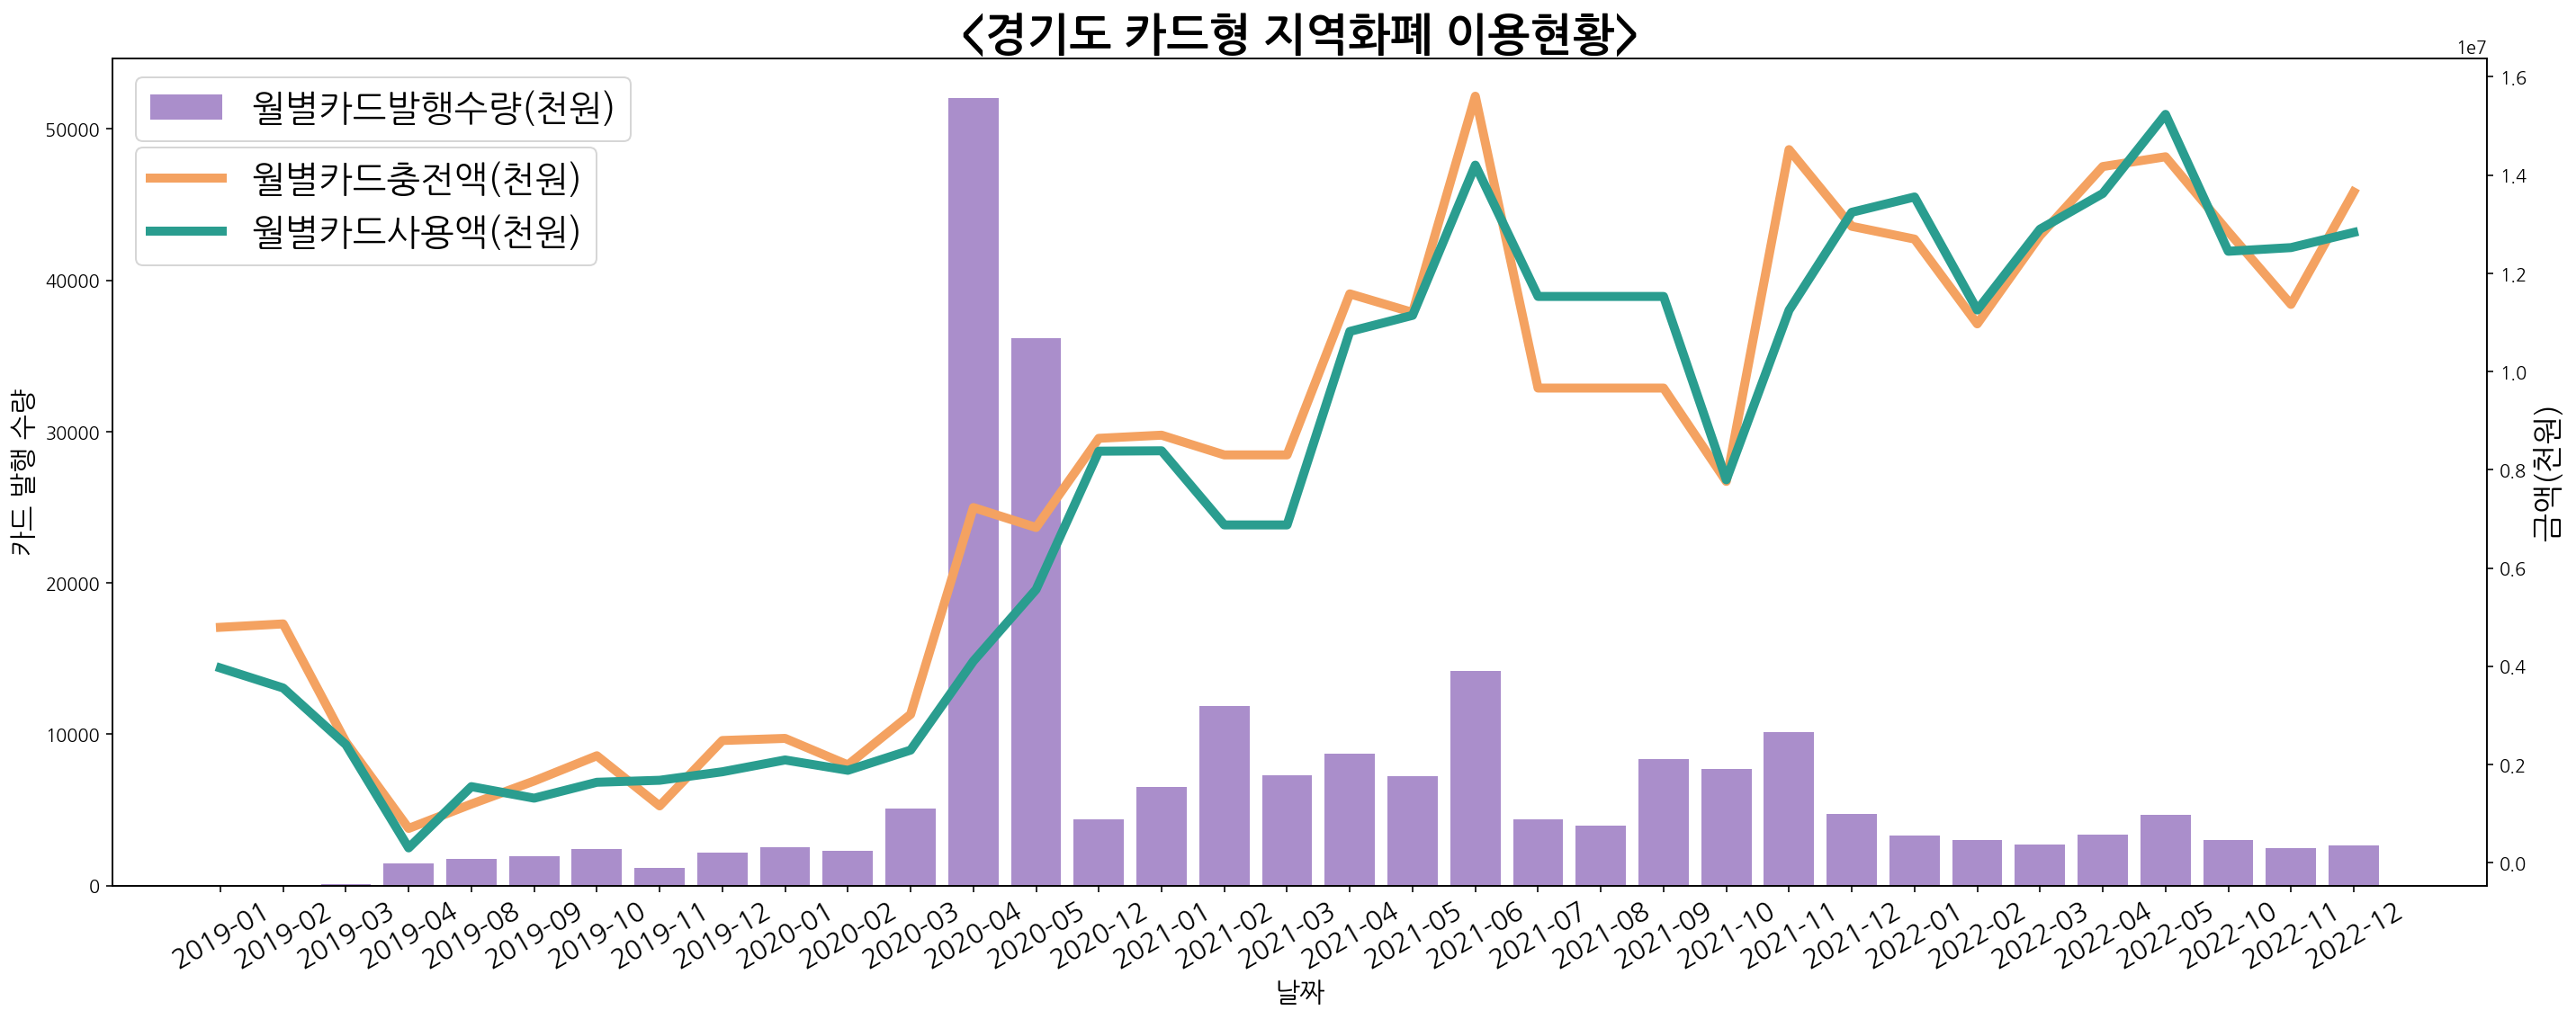

In [19]:
plt.figure(figsize = (20, 8))

time = df_gg_card['STD_YM'].unique()
time.sort()

ax1 = sns.barplot(x = "STD_YM", y = "CARD_PUBLCT_CNT", data = df_gg_card, label = "월별카드발행수량(천원)", color = "#560bad", alpha = 0.5)
ax1.set_xlabel("날짜", fontsize = 15, fontweight = "medium")
ax1.set_ylabel("카드 발행 수량", fontsize = 15, fontweight = "medium")
ax1.set_xticklabels(labels = time, fontsize = 15, fontweight = "medium", rotation = 30)
ax1.legend(fontsize = 20, loc = (0.01, 0.9))

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = "STD_YM", y = "CARD_CHRGNG_AMT", data = df_gg_card, label = "월별카드충전액(천원)", color = "#f4a261", linewidth = 5)
ax2 = sns.lineplot(x = "STD_YM", y = "CARD_USE_AMT", data = df_gg_card, label = "월별카드사용액(천원)", color = "#2a9d8f", linewidth = 5)
ax2.set_ylabel("금액(천원)", fontsize = 17, fontweight = "medium")

ax1.set_title("<경기도 카드형 지역화폐 이용현황>", fontsize = 25, fontweight = "semibold")

plt.legend(fontsize = 20, loc = (0.01, 0.75))
plt.tight_layout()
plt.savefig("경기도 카드형 지역화폐 이용현황.png")
plt.show()

### 모바일형 지역화폐 이용현황

In [14]:
df_gg_mobile.drop([32,33], inplace = True)

In [15]:
df_gg_mobile

STD_YM  MOBILE_GIFTCERTF_USER_CNT  MOBILE_CHRGNG_AMT  MOBILE_USE_AMT
0   2019-01                 813.000000                NaN             NaN
1   2019-02                6526.000000       3.705250e+05    5.893950e+04
2   2019-03                2796.333333       7.882200e+05    2.623787e+05
3   2019-04                4500.333333       3.384317e+05    3.588367e+05
4   2019-08                3983.333333       1.830311e+06    2.188063e+06
5   2019-09                5423.000000       3.800558e+06    2.598947e+06
6   2019-10                3847.333333       3.092179e+06    3.180244e+06
7   2019-11                3349.000000       2.527478e+06    2.858398e+06
8   2019-12                3981.000000       4.005129e+06    3.332524e+06
9   2020-01                5109.000000       6.340931e+06    4.071635e+06
10  2020-02                3991.000000       5.431040e+06    4.399053e+06
11  2020-03               24655.333333       6.788728e+06    5.195703e+06
12  2020-04               26312.666667       8.137525e+06    6.853801e+06
13  2020-05               10883.000000       9.218127e+06    7.739201e+06
14  2020-12                6846.333333       1.026509e+07    1.227914e+07
15  2021-01               11946.000000       2.188773e+07    1.765134e+07
16  2021-02               11350.666667       2.054240e+07    1.752217e+07
17  2021-03                9132.666667       2.146350e+07    2.119547e+07
18  2021-04                9458.333333       2.323718e+07    2.320000e+07
19  2021-05                8653.333333       2.434344e+07    2.340232e+07
20  2021-06               30379.666667       3.058925e+07    3.088359e+07
21  2021-07                9979.000000       2.320158e+07    2.499876e+07
22  2021-08                9619.666667       2.091933e+07    2.187118e+07
23  2021-09                8166.666667       1.478043e+07    1.548799e+07
24  2021-10               12623.000000       2.302622e+07    1.642057e+07
25  2021-11               11132.000000       3.128526e+07    2.476039e+07
26  2021-12                4717.333333       2.075663e+07    2.450455e+07
27  2022-01                9063.333333       3.397933e+07    2.896521e+07
28  2022-02                6581.666667       2.470746e+07    2.551880e+07
29  2022-03                7713.000000       2.837354e+07    2.899830e+07
30  2022-04                7018.000000       2.927896e+07    3.030195e+07
31  2022-05                4487.000000       3.168496e+07    3.303447e+07
34  2022-12                3585.333333       2.856279e+07    2.367726e+07

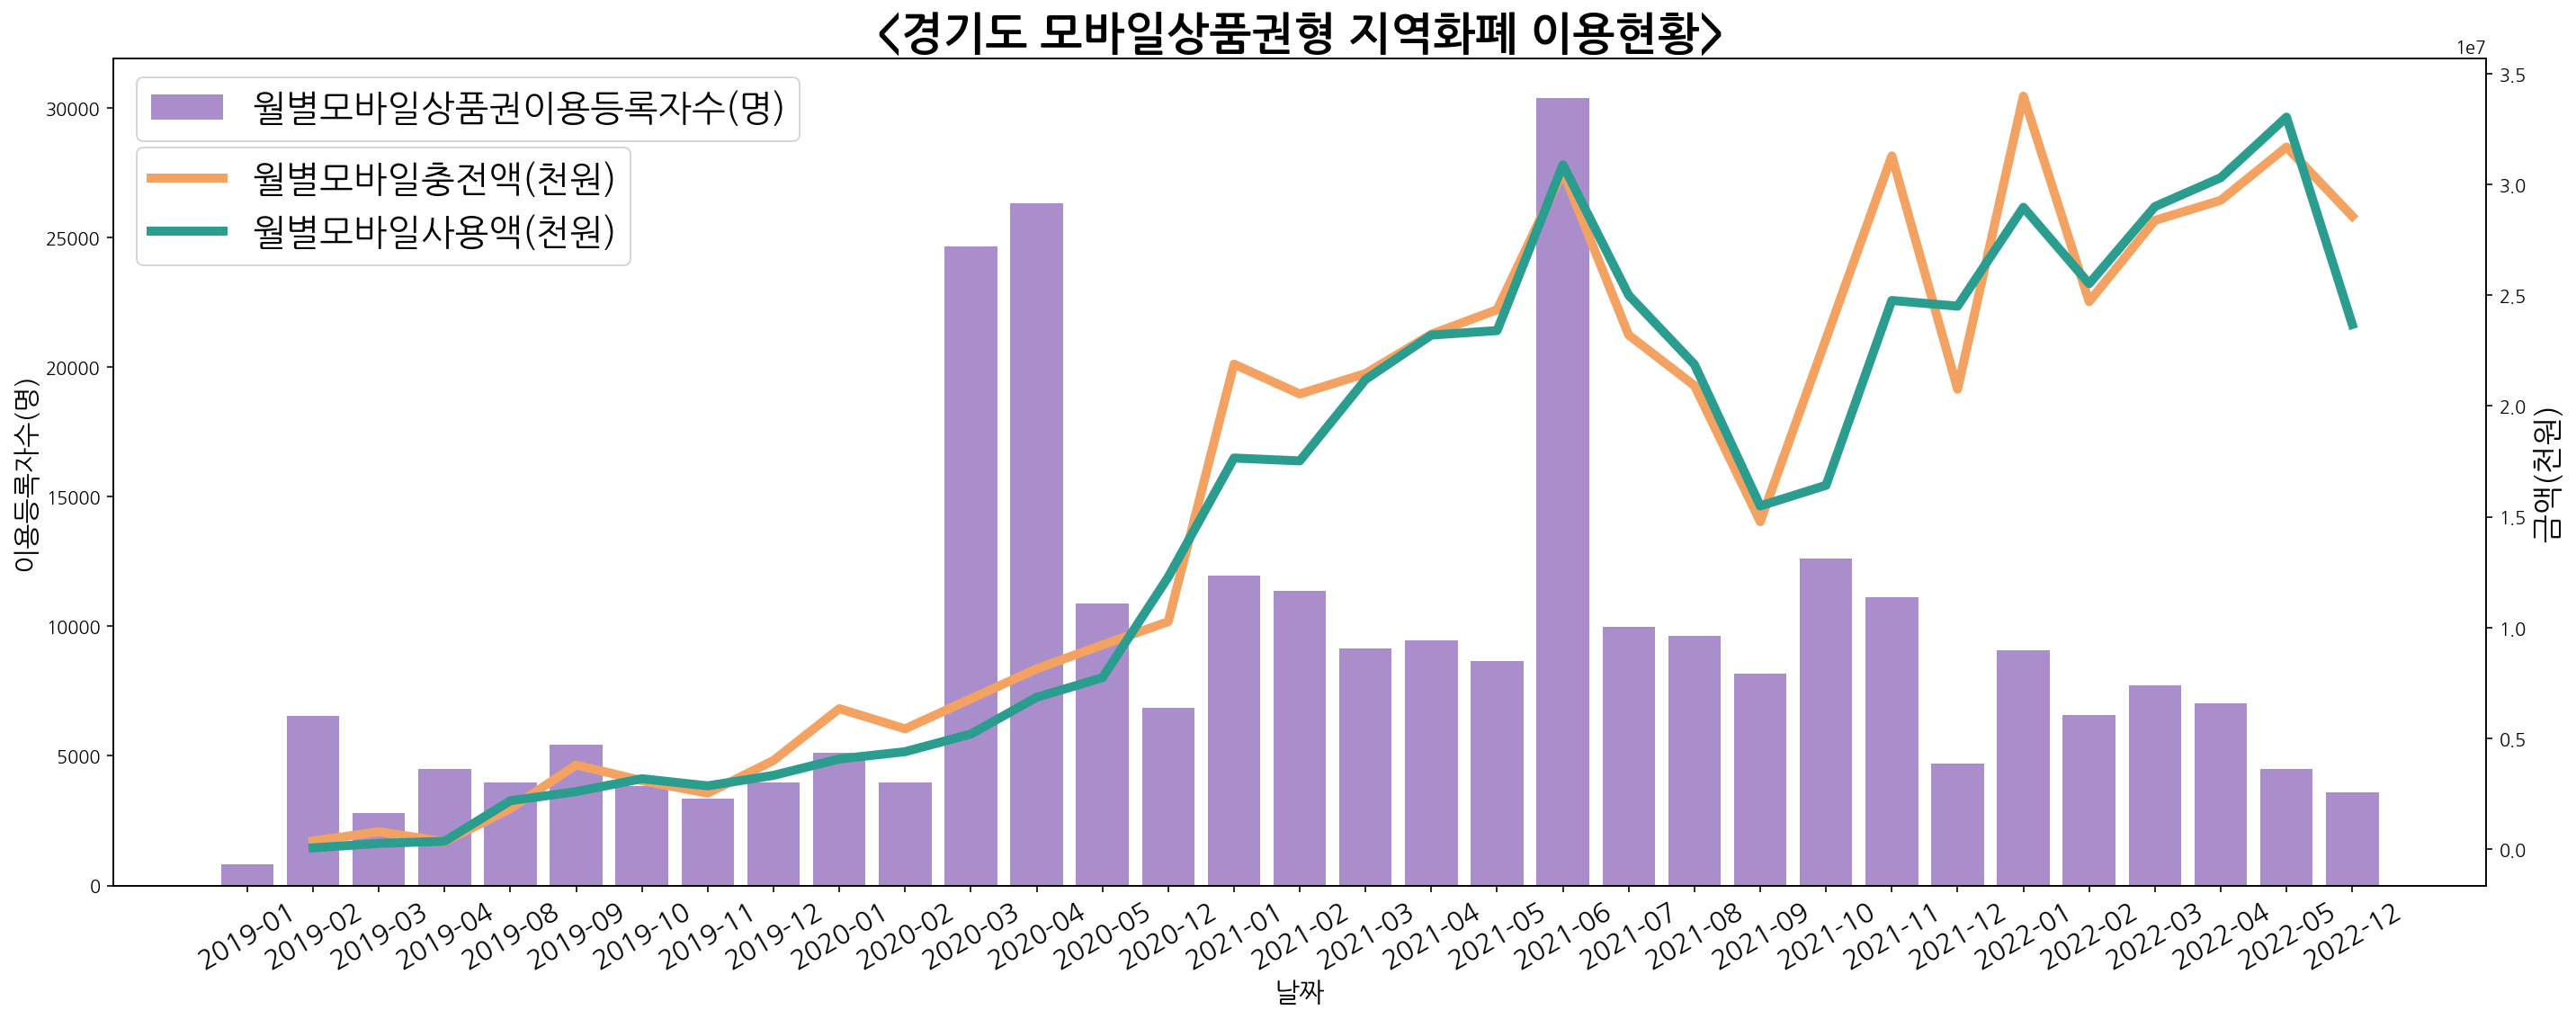

In [20]:
plt.figure(figsize = (20, 8))

time = df_gg_mobile['STD_YM'].unique()
time.sort()

ax1 = sns.barplot(x = "STD_YM", y = "MOBILE_GIFTCERTF_USER_CNT", data = df_gg_mobile, label = "월별모바일상품권이용등록자수(명)", color = "#560bad", alpha = 0.5)
ax1.set_xlabel("날짜", fontsize = 15, fontweight = "medium")
ax1.set_ylabel("이용등록자수(명)", fontsize = 15, fontweight = "medium")
ax1.set_xticklabels(labels = time, fontsize = 15, fontweight = "medium", rotation = 30)
ax1.legend(fontsize = 20, loc = (0.01, 0.9))

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = "STD_YM", y = "MOBILE_CHRGNG_AMT", data = df_gg_mobile, label = "월별모바일충전액(천원)", color = "#f4a261", linewidth = 5)
ax2 = sns.lineplot(x = "STD_YM", y = "MOBILE_USE_AMT", data = df_gg_mobile, label = "월별모바일사용액(천원)", color = "#2a9d8f", linewidth = 5)
ax2.set_ylabel("금액(천원)", fontsize = 17, fontweight = "medium")

ax1.set_title("<경기도 모바일상품권형 지역화폐 이용현황>", fontsize = 25, fontweight = "semibold")

plt.legend(fontsize = 20, loc = (0.01, 0.75))
plt.tight_layout()
plt.savefig("경기도 모바일상품권형 지역화폐 이용현황.png")
plt.show()

### 지류상품권형 지역화폐 이용현황

In [17]:
df_gg_giftcertif.drop(32, inplace=True)

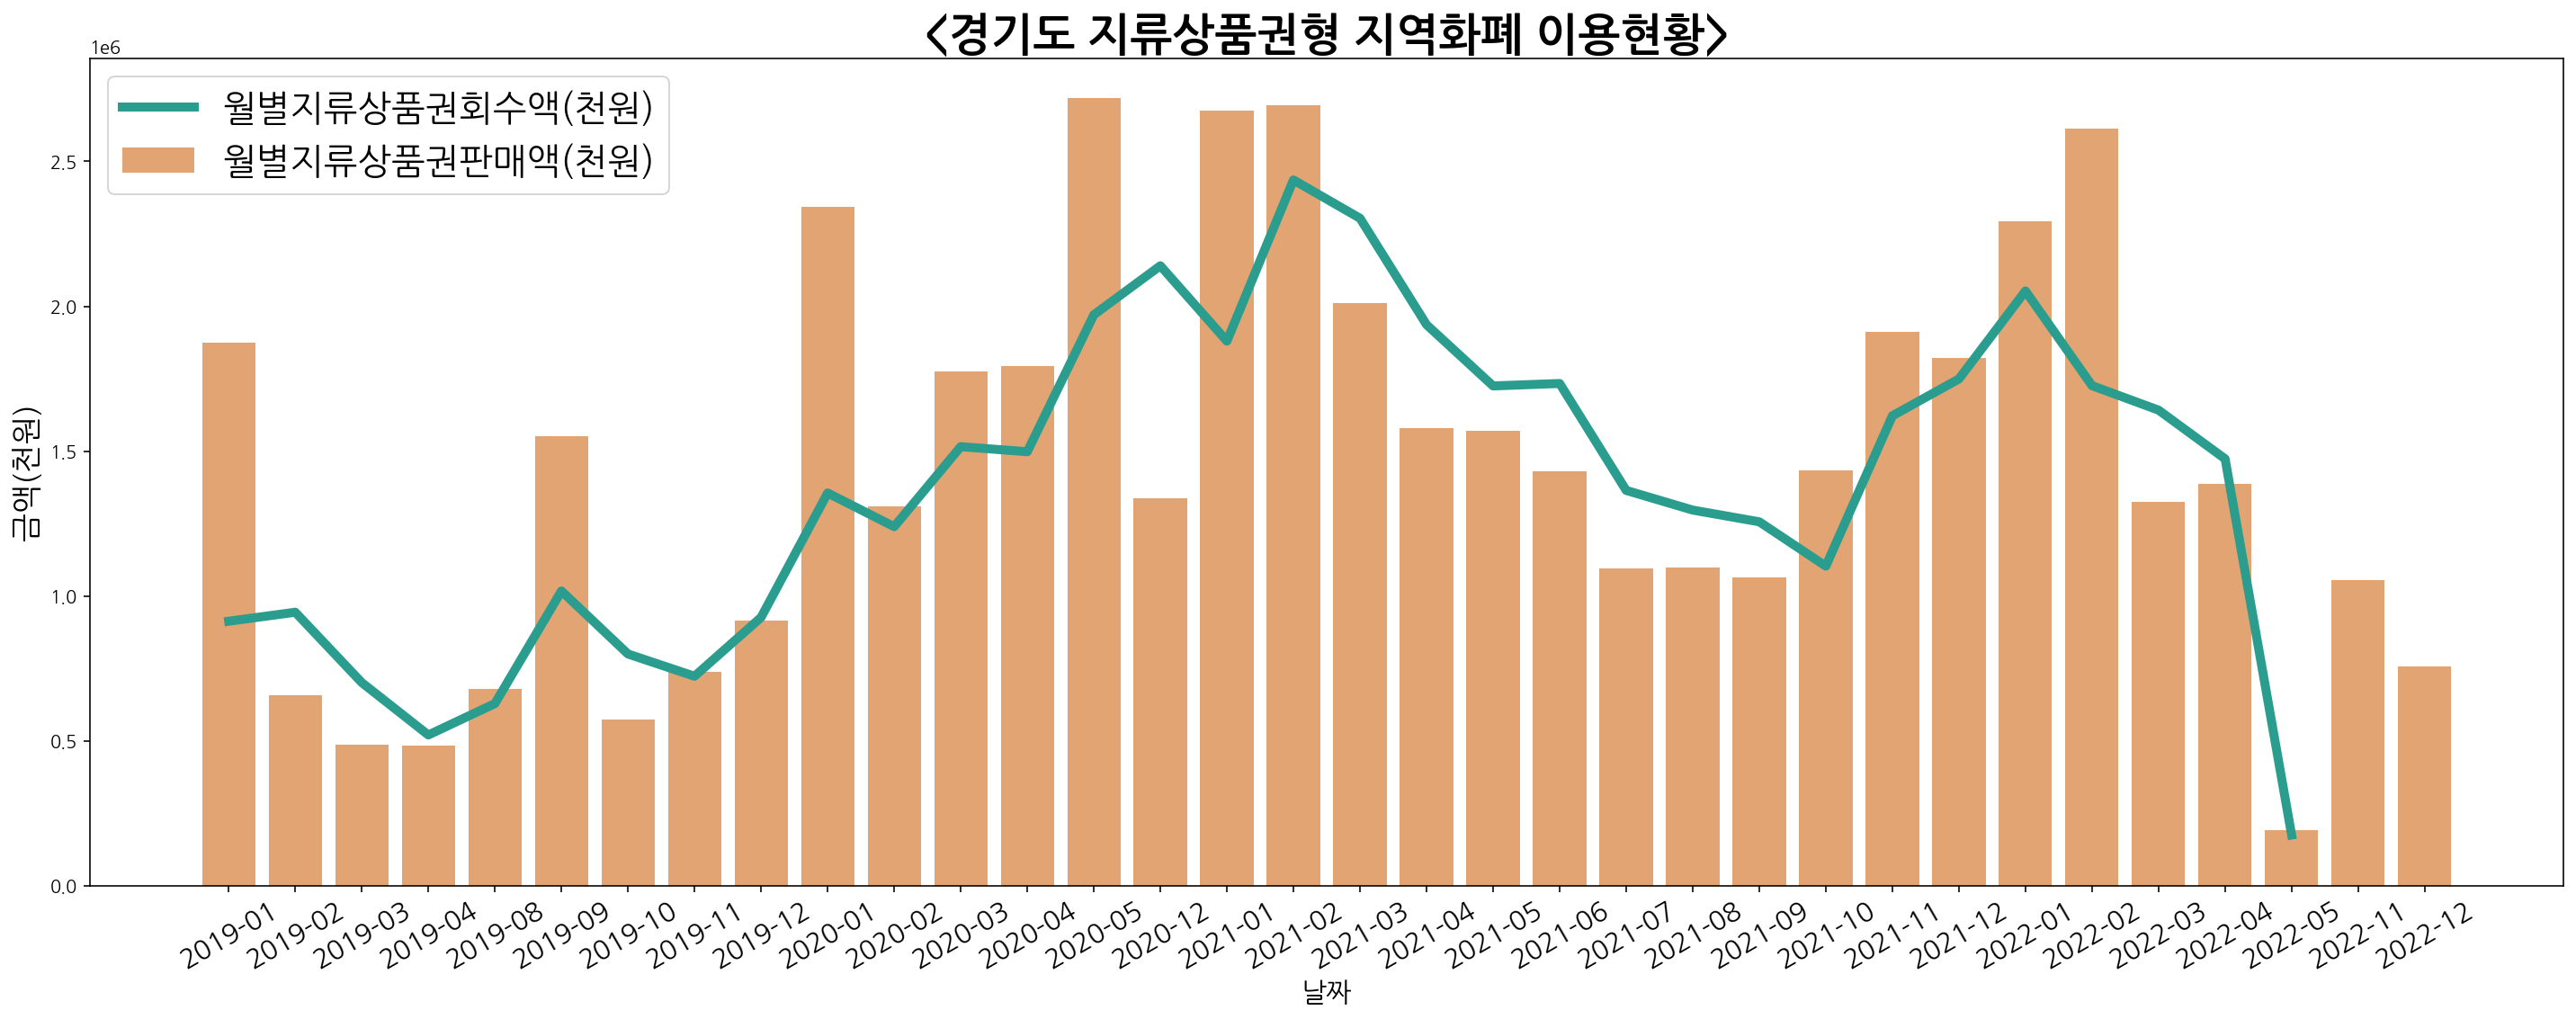

In [21]:
plt.figure(figsize = (20, 8))

time = df_gg_giftcertif['STD_YM'].unique()
time.sort()

# ax1 = sns.barplot(x = "STD_YM", y = "MOBILE_GIFTCERTF_USER_CNT", data = df_gg_giftcertif, label = "월별카드발행수량(천원)", color = "#560bad", alpha = 0.5)
# ax1.set_xlabel("날짜", fontsize = 15, fontweight = "medium")
# ax1.set_ylabel("이용등록자수", fontsize = 15, fontweight = "medium")
# ax1.set_xticklabels(labels = time, fontsize = 15, fontweight = "medium", rotation = 30)

# ax2 = ax1.twinx()
ax2 = sns.barplot(x = "STD_YM", y = "BRNHSTRM_GIFTCERTF_SALE_AMT", data = df_gg_giftcertif, label = "월별지류상품권판매액(천원)", color = "#f4a261", linewidth = 5)
ax2 = sns.lineplot(x = "STD_YM", y = "BRNHSTRM_GIFTCERTF_RETRVL_AMT", data = df_gg_giftcertif, label = "월별지류상품권회수액(천원)", color = "#2a9d8f", linewidth = 5)
ax2.set_ylabel("금액(천원)", fontsize = 17, fontweight = "medium")
ax2.set_xlabel("날짜", fontsize = 15, fontweight = "medium")
ax2.set_xticklabels(labels = time, fontsize = 15, fontweight = "medium", rotation = 30)
ax2.set_title("<경기도 지류상품권형 지역화폐 이용현황>", fontsize = 25, fontweight = "semibold")

plt.legend(fontsize = 20, loc = "upper left")
plt.tight_layout()
plt.savefig("경기도 지류상품권형 지역화폐 이용현황.png")
plt.show()